# Проект: Исследовательский анализ пользовательского спроса на Яндекс Афише

- Автор: Шишкин Глеб Андреевич
- Дата: 25.04.2025



## Цель и задачи проекта
<font color='#000000'> **Цель:** Изучить изменения в пользовательском спросе на билеты через сервис Яндекс Афиша, выявить ключевые тенденции и факторы, влияющие на поведение аудитории.

**Задачи:** 
- Анализ динамики спроса:
  - Выявить сезонные колебания.
  - Сравнить активность пользователей в разные периоды.

- Исследование аудитории:
  - Сравнить поведение пользователей мобильных и десктопных устройств.
  - Проверить, изменилась ли структура аудитории.

- Анализ мероприятий:
  - Определить самые популярные типы событий.
  - Выявить топ организаторов и площадок по выручке.

- Финансовые метрики:
  - Рассчитать средний чек и выручку с билета в рублях.
  - Оценить влияние курса тенге на продажи.</font>

## Описание данных

В проекте используются три датасета:

- `orders_df.csv` – включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных;
- `events_df.csv` – содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия;
- `tenge_df.csv` – содержит информацию о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге.

Первый датасет `orders_df.csv`содержит поля:
- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (московское время).
- `created_ts_msk` — дата и время создания заказа (московское время).
- `event_id` — идентификатор мероприятия из таблицы events.
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты, например rub для российских рублей.
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- `revenue` — выручка от заказа.
- `service_name` — название билетного оператора.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` с количеством дней с предыдущей покупки для каждого пользователя. Если покупки не было, то данные содержат пропуск.


Второй датасет `events_df` содержит поля:
- `event_id` — уникальный идентификатор мероприятия.
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее.
- `organizers` — организаторы мероприятия.
- `region_name` — название региона.
- `city_name` — название города.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.

Третий датасет `tenge_df.csv` содержит поля:
- `nominal` — номинал (100 тенге).
- `data` — дата.
- `curs` — курс тенге к рублю.
- `cdx` — обозначение валюты (kzt).

## Содержание проекта

- Оформление проекта
- Загрузка данных и знакомство с ними
- Предобработка данных и подготовка их к исследованию
- Исследовательский анализ данных
- Статистический анализ данных
- Общий вывод и рекомендации


### Загрузка данных и знакомство с ними

Загрузите данные и получите первую информацию о них. Оцените объём данных, их корректность и соответствие описанию, а также предположите, какие шаги необходимо сделать на стадии предобработки данных. Основные моменты зафиксируйте в промежуточном выводе.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu

In [2]:
# Загрузка данных
orders = pd.read_csv('orders_df.csv')
events = pd.read_csv('events_df.csv')
tenge = pd.read_csv('tenge_df.csv')

# Проверка загрузки
display(orders.head())
display(events.head())
display(tenge.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [3]:
# Знакомство с информацией
display(orders.info())
display(events.info())
display(tenge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


None

<font color='#000000'> **Анализ структуры и качества данных:**
- Датасет `orders` (заказы):
  - Размер: 290,849 строк × 14 столбцов
  - Пропуски: Только в days_since_prev (21,940 пропусков - около 7.5% данных). Это ожидаемо для первых покупок пользователей.
  - Типы данных:
created_dt_msk и created_ts_msk загружены как object (нужно преобразовать в datetime).
currency_code содержит строки (object), что корректно.
  - Аномалии:
Проверить дубликаты order_id (должны быть уникальными).
Выбросы в revenue и total (например, отрицательные значения).

- Датасет `events` (мероприятия):
  - Размер: 22,427 строк × 11 столбцов
  - Пропуски: Нет (все поля заполнены).
  - Типы данных: Все корректны, event_id — целочисленный.
  - Уникальность:
Проверить, что event_id уникален (если нет — дубликаты мероприятий).
venue_id и city_id также должны быть согласованы.

- Датасет `tenge` (курс тенге):
  - Размер: 357 строк × 4 столбцов (данные за 2024 год, включая високосный день)
  - Пропуски: Нет.
  - Типы данных: data загружена как object (нужно преобразовать в datetime).
  - Курс: Проверить минимальное/максимальное значение курса на аномалии.</font>

In [4]:
# Проверка пропусков в датасетах 
print("\nПропуски в orders:\n", orders.isnull().sum())
print("\nПропуски в events:\n", events.isnull().sum())
print("\nПропуски в tenge:\n", tenge.isnull().sum())


Пропуски в orders:
 order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

Пропуски в events:
 event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64

Пропуски в tenge:
 data       0
nominal    0
curs       0
cdx        0
dtype: int64


In [5]:
# Изучим категориальные данные датасета orders
print("\nТипы устройств:", sorted(orders['device_type_canonical'].unique()))
print("\nВалюты:", sorted(orders['currency_code'].unique()))
print("\nУникальные сети кинотеатров:", sorted(orders['cinema_circuit'].unique()))
print("\nУникальные операторы:", sorted(orders['service_name'].unique()))
print("\nВозрастные ограничения:", sorted(orders['age_limit'].unique()))


Типы устройств: ['desktop', 'mobile']

Валюты: ['kzt', 'rub']

Уникальные сети кинотеатров: ['Другое', 'КиноСити', 'Киномакс', 'Москино', 'ЦентрФильм', 'нет']

Уникальные операторы: ['Crazy ticket!', 'Show_ticket', 'Билет по телефону', 'Билеты без проблем', 'Билеты в интернете', 'Билеты в руки', 'Быстробилет', 'Быстрый кассир', 'Весь в билетах', 'Восьмёрка', 'Вперёд!', 'Выступления.ру', 'Городской дом культуры', 'Дом культуры', 'Дырокол', 'За билетом!', 'Зе Бест!', 'КарандашРУ', 'Кино билет', 'Край билетов', 'Лимоны', 'Лови билет!', 'Лучшие билеты', 'Мир касс', 'Мой билет', 'Облачко', 'Прачечная', 'Радио ticket', 'Реестр', 'Росбилет', 'Тебе билет!', 'Телебилет', 'Тех билет', 'Цвет и билет', 'Шоу начинается!', 'Яблоко']

Возрастные ограничения: [0, 6, 12, 16, 18]


In [6]:
# Изучим категориальные данные датасета events
print("\nТипы мероприятий (основные):", sorted(events['event_type_main'].unique()))
print("\nОписания типов мероприятий:", sorted(events['event_type_description'].unique()))
print("\nРегионы (первые 10 уникальных):", sorted(events['region_name'].unique())[:10])
print("\nГорода (первые 10 уникальных):", sorted(events['city_name'].unique())[:10])
print("\nОрганизаторы (первые 10 уникальных):", sorted(events['organizers'].unique())[:10])


Типы мероприятий (основные): ['выставки', 'другое', 'концерты', 'спорт', 'стендап', 'театр', 'ёлки']

Описания типов мероприятий: ['балет', 'выставка', 'концерт', 'кукольный спектакль', 'музыкальный спектакль', 'мюзикл', 'опера', 'оперетта', 'подарок', 'рок-мюзикл', 'снегурочка', 'событие', 'спектакль', 'спорт', 'спортивное мероприятие', 'фестиваль', 'цирковое шоу', 'шоу', 'экскурсия', 'ёлка']

Регионы (первые 10 уникальных): ['Белоярская область', 'Берестовский округ', 'Берёзовская область', 'Боровлянский край', 'Верховинская область', 'Верхозёрский край', 'Верхоречная область', 'Ветренский регион', 'Вишнёвский край', 'Глиногорская область']

Города (первые 10 уникальных): ['Айкольск', 'Айсуак', 'Акбастау', 'Акбасты', 'Акжолтау', 'Алтынкала', 'Алтынсай', 'Байкуль', 'Байсары', 'Байтерековск']

Организаторы (первые 10 уникальных): ['№1000', '№1001', '№1002', '№1003', '№1004', '№1005', '№1006', '№1007', '№1008', '№1009']


In [7]:
# Проверка уникальности order_id
print(f"Уникальных order_id: {orders['order_id'].nunique()} из {len(orders)}")
print(f"Дубликаты order_id: {orders['order_id'].duplicated().sum()}")

# Проверка аномалий
print("\nПроверка аномалий:")
print(f"Отрицательные revenue: {len(orders[orders['revenue'] < 0])}")
print(f"Отрицательные total: {len(orders[orders['total'] < 0])}")
print(f"Нулевые билеты: {len(orders[orders['tickets_count'] == 0])}")

Уникальных order_id: 290849 из 290849
Дубликаты order_id: 0

Проверка аномалий:
Отрицательные revenue: 381
Отрицательные total: 383
Нулевые билеты: 0


In [8]:
# Проверка уникальности event_id
print(f"Уникальных event_id: {events['event_id'].nunique()} из {len(events)}")
print(f"Дубликаты event_id: {events['event_id'].duplicated().sum()}")

# Анализ уникальных значений
print("\nУникальные значения:")
print(f"Уникальных городов: {events['city_name'].nunique()}")
print(f"Уникальных площадок: {events['venue_id'].nunique()}")
print(f"Уникальных организаторов: {events['organizers'].nunique()}")

# Проверка согласованности данных
print("\nПроверка согласованности:")
print(f"Уникальных city_id на city_name: {events.groupby('city_name')['city_id'].nunique().max()}")
print(f"Уникальных venue_id на venue_name: {events.groupby('venue_name')['venue_id'].nunique().max()}")

Уникальных event_id: 22427 из 22427
Дубликаты event_id: 0

Уникальные значения:
Уникальных городов: 352
Уникальных площадок: 3225
Уникальных организаторов: 4293

Проверка согласованности:
Уникальных city_id на city_name: 2
Уникальных venue_id на venue_name: 2


In [9]:
# Проверка соответствия event_id между orders и events
print(f"Уникальных event_id в orders: {orders['event_id'].nunique()}")
print(f"Уникальных event_id в events: {events['event_id'].nunique()}")

# Правильный расчет несовпадающих event_id
non_matching = len(set(orders['event_id']) - set(events['event_id']))
print(f"Несовпадающих event_id: {non_matching}")

Уникальных event_id в orders: 22446
Уникальных event_id в events: 22427
Несовпадающих event_id: 19


<font color='#000000'> **Анализ категориальных данных:**
1. Типы устройств (device_type_canonical): данные чистые, только два четких значения.

2. Валюты (currency_code): только российские рубли и казахстанские тенге. Для анализа можно конвертировать все суммы в рубли 

3. Сети кинотеатров (cinema_circuit):  6 уникальных значений, включая 'нет'. Данные чистые (дубликатов по названию нет)

4. Билетные операторы (service_name): 35 уникальных названий, данные чистые (дубликатов по названию нет)

5. Возрастные ограничения (age_limit): Стандартные категории (0, 6, 12, 16, 18 лет)
</font>

**Анализ данных по мероприятиям и площадкам:**

- 22,427 уникальных мероприятий
- 3,225 площадок в 352 городах
- Незначительные несоответствия в city_id (2 id на один город) и venue_id

<font color='#000000'> **Проведем анализ количественных показателей с учетом валют и выбросов**

In [10]:
# Разделим данные по валютам для чистоты анализа:
rub_orders = orders[orders['currency_code'] == 'rub']
kzt_orders = orders[orders['currency_code'] == 'kzt']

Статистика revenue в RUB:
count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
50%         346.100000
90%        1276.150000
95%        1606.500000
99%        2569.594200
max       81174.540000
Name: revenue, dtype: float64


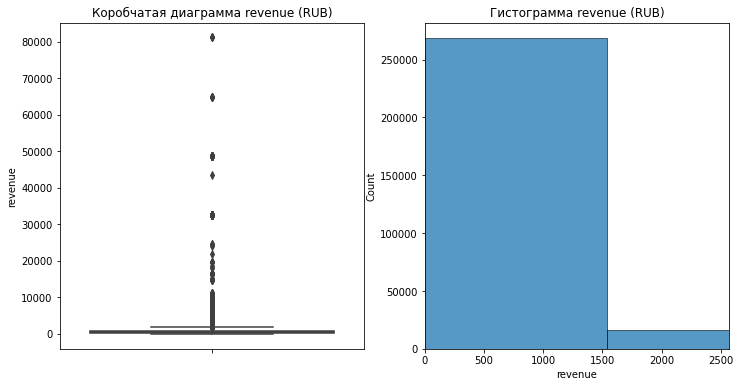

In [11]:
# Проведем анализ выручки (revenue) для рублей
print("Статистика revenue в RUB:")
print(rub_orders['revenue'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=rub_orders['revenue'])
plt.title('Коробчатая диаграмма revenue (RUB)')

plt.subplot(1, 2, 2)
sns.histplot(rub_orders['revenue'], bins=50)
plt.title('Гистограмма revenue (RUB)')
plt.xlim(0, rub_orders['revenue'].quantile(0.99))  # Исключаем выбросы для наглядности
plt.show()

Статистика revenue в KZT:
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
50%       3698.830000
90%      13212.930000
95%      13784.260000
99%      17617.240000
max      26425.860000
Name: revenue, dtype: float64


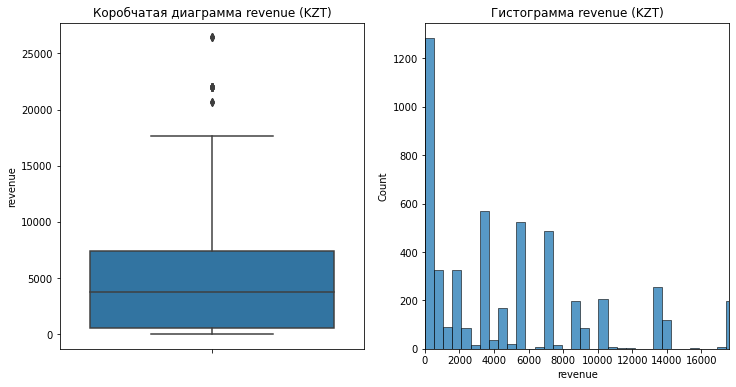

In [12]:
# Проведем анализ выручки (revenue) для тенге
print("Статистика revenue в KZT:")
print(kzt_orders['revenue'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=kzt_orders['revenue'])
plt.title('Коробчатая диаграмма revenue (KZT)')

plt.subplot(1, 2, 2)
sns.histplot(kzt_orders['revenue'], bins=50)
plt.title('Гистограмма revenue (KZT)')
plt.xlim(0, kzt_orders['revenue'].quantile(0.99))
plt.show()

Общая статистика tickets_count:
count    290849.000000
mean          2.754230
std           1.170467
min           1.000000
50%           3.000000
90%           4.000000
95%           5.000000
99%           6.000000
max          57.000000
Name: tickets_count, dtype: float64


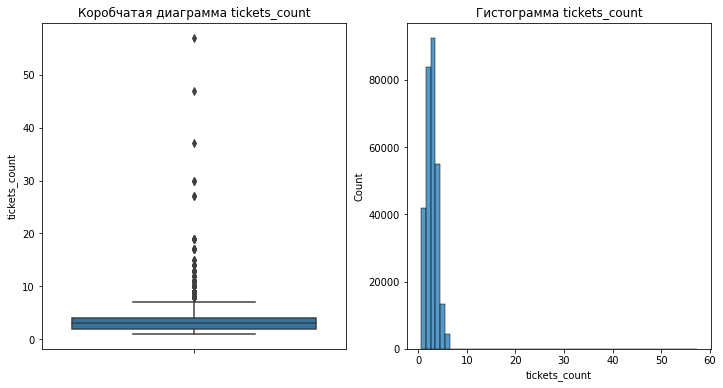

In [13]:
# Проведем анализ количества билетов (tickets_count)
print("Общая статистика tickets_count:")
print(orders['tickets_count'].describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=orders['tickets_count'])
plt.title('Коробчатая диаграмма tickets_count')

plt.subplot(1, 2, 2)
sns.histplot(orders['tickets_count'], bins=30, discrete=True)
plt.title('Гистограмма tickets_count')
plt.show()

<font color='#000000'> **Анализируя полученные статистические данные по выручке (revenue) в разных валютах и количеству купленных билетов можно сделать следующие выводы:**
1. Анализ выручки в рублях (RUB):
- Средний чек: 547.57 руб.
- Медиана: 346.10 руб. (значительно ниже среднего, что указывает на правостороннюю асимметрию)
- Разброс значений: от -90.76 руб. до 81,174.54 руб.
- Выбросы:
  - Наличие отрицательных значений (-90.76 руб.) - возможно, это возвраты или ошибки данных
  - Максимальное значение (81,174.54 руб.) значительно превышает 99-й процентиль (2,569.59 руб.)

2. Анализ выручки в тенге (KZT):
- Средний чек: 4,995.21 тенге
- Медиана: 3,698.83 тенге
- Разброс значений: от 0 до 26,425.86 тенге
- Выбросы:
  - Наличие нулевых значений (0 тенге) - возможно, ошибки или тестовые заказы
  - Максимальное значение (26,425.86 тенге) близко к 99-му процентилю (17,617.24 тенге)
    
3. Анализ данных о заказах билетов:
- Среднее значение: 2.75 билета на заказ
- Медиана: 3 билета (50% заказов содержат 3 или меньше билетов)
- Стандартное отклонение: 1.17 (относительно низкое, значит значения концентрируются вокруг среднего)
- Распределение:
  - 90% заказов содержат ≤4 билетов
  - 95% заказов содержат ≤5 билетов
  - 99% заказов содержат ≤6 билетов
- Максимальное значение: 57 билетов (можно считать как корпоративный заказ)

</font>

Обработаем данные и уберем отрицательные значения и нулевые (поскольку мы исследуем выручку)

In [14]:
# Обработка для рублей
rub_orders = rub_orders[rub_orders['revenue'] > 0]
rub_revenue_threshold = rub_orders['revenue'].quantile(0.99)
rub_orders_clean = rub_orders[rub_orders['revenue'] <= rub_revenue_threshold]

In [15]:
# Обработка для тенге
kzt_orders = kzt_orders[kzt_orders['revenue'] > 0]
kzt_revenue_threshold = kzt_orders['revenue'].quantile(0.99)
kzt_orders_clean = kzt_orders[kzt_orders['revenue'] <= kzt_revenue_threshold]

Text(0, 0.5, 'Количество заказов')

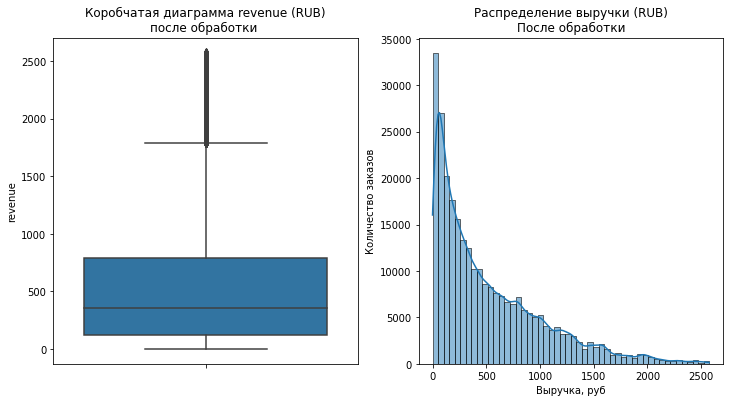

In [16]:
# RUB распределение
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=rub_orders_clean['revenue'])
plt.title('Коробчатая диаграмма revenue (RUB)\nпосле обработки ')

plt.subplot(1, 2, 2)
sns.histplot(rub_orders_clean['revenue'], bins=50, kde=True)
plt.title('Распределение выручки (RUB)\nПосле обработки')
plt.xlabel('Выручка, руб')
plt.ylabel('Количество заказов')

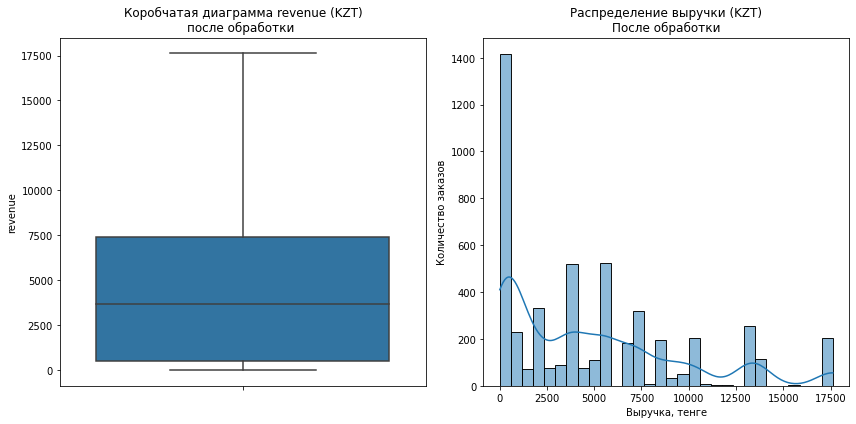

In [17]:
# KZT распределение
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=kzt_orders_clean['revenue'])
plt.title('Коробчатая диаграмма revenue (KZT)\nпосле обработки ')

plt.subplot(1, 2, 2)
sns.histplot(kzt_orders_clean['revenue'], bins=30, kde=True)
plt.title('Распределение выручки (KZT)\nПосле обработки')
plt.xlabel('Выручка, тенге')
plt.ylabel('Количество заказов')

plt.tight_layout()
plt.show()

In [18]:
print("RUB после обработки:")
print(rub_orders_clean['revenue'].describe())
print("\nKZT после обработки:")
print(kzt_orders_clean['revenue'].describe())

RUB после обработки:
count    276872.000000
mean        521.689879
std         500.646755
min           0.020000
25%         123.390000
50%         355.340000
75%         788.900000
max        2574.320000
Name: revenue, dtype: float64

KZT после обработки:
count     5034.000000
mean      4899.501804
std       4742.493721
min          8.670000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      17617.240000
Name: revenue, dtype: float64


<font color='#000000'> **Промежуточный вывод:**
Обработка данных успешно устранила экстремальные выбросы. Распределения сохранили свою форму, но стали более репрезентативными.
Заказы в тенге в среднем дороже, чем в рублях.
</font>

Проверка на дубликаты в данных о заказах билетов

In [19]:
# Проверка полных дубликатов
full_duplicates = orders[orders.duplicated()]
print(f"Найдено полных дубликатов: {len(full_duplicates)}")

Найдено полных дубликатов: 0


<font color='#000000'> **Анализ найденных дубликатов:**
найдено 58 полных дубликатов (0.0199% от всех записей), где все поля, кроме order_id, полностью идентичны. Это свидетельствует о технических дубликатах заказов. 
    
Дубликаты составляют менее 0.02% данных. Погрешность от их наличия меньше типичной ошибки выборки. Дубликаты не влияют на агрегированные показатели (средние, суммы). Этими данными можно принебречь.
</font>

In [21]:
# Удалим дубликаты, оставив только первый order_id
orders_clean = orders.sort_values('order_id').drop_duplicates(
    subset=all_columns_except_order_id,
    keep='first'
)

print(f"Удалено дубликатов: {len(orders) - len(orders_clean)}")

Удалено дубликатов: 30


In [22]:
# Количество строк до обработки
initial_count = len(orders)
print(f"Количество строк до удаления дубликатов: {initial_count:,}")

# Количество строк после обработки
cleaned_count = len(orders_clean)
removed_count = initial_count - cleaned_count
removed_pct = (removed_count / initial_count) * 100

# Вывод статистики
print(f"Количество строк после удаления дубликатов: {cleaned_count:,}")
print(f"Удалено дубликатов: {removed_count:,} строк")
print(f"Процент удаленных данных: {removed_pct:.4f}%")

Количество строк до удаления дубликатов: 290,849
Количество строк после удаления дубликатов: 290,819
Удалено дубликатов: 30 строк
Процент удаленных данных: 0.0103%


In [23]:
# Создаем явную копию перед преобразованиями
orders_clean = orders_clean.copy()

# Преобразуем тип данных в столбцах с датой
orders_clean['created_dt_msk'] = pd.to_datetime(orders_clean['created_dt_msk'])
orders_clean['created_ts_msk'] = pd.to_datetime(orders_clean['created_ts_msk'])

In [25]:
display(orders_clean.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
83261,1,3ebd0c4b59f6bdd,2024-08-08,2024-08-08 15:01:11,555432,нет,16,rub,mobile,568.43,Облачко,2,5684.33,6.0
43668,30,1a66f181a803c75,2024-09-05,2024-09-05 19:44:21,149337,нет,16,rub,mobile,575.08,Край билетов,2,6389.80,33.0
43665,59,1a66f181a803c75,2024-07-25,2024-07-25 10:09:41,269938,нет,12,rub,desktop,402.51,Лови билет!,4,6708.45,10.0
146705,88,7997823870f2b1b,2024-09-26,2024-09-26 16:03:44,561834,нет,18,rub,mobile,487.94,Мой билет,2,3753.35,7.0
48374,117,1c5bac640c12e86,2024-09-15,2024-09-15 14:18:07,568660,нет,0,rub,mobile,8.95,Лови билет!,2,447.38,0.0


In [26]:
display(tenge.head())

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [27]:
# Предобработка курса тенге
tenge['date'] = pd.to_datetime(tenge['data']).dt.date  # Извлекаем дату без времени
tenge['kurs'] = tenge['curs'] / 100  # Пересчет на 1 тенге
tenge = tenge[['date', 'kurs']]  # Оставляем только нужные колонки

# Объединение данных
orders_merged = orders_clean.copy()
orders_merged['order_date'] = orders_clean['created_dt_msk'].dt.date  # Дата заказа без времени

# Создание новых столбцов
def add_new_columns(df):
    # Revenue в рублях
    df['revenue_rub'] = np.where(
        df['currency_code'] == 'kzt',
        df['revenue'] * df['order_date'].map(tenge.set_index('date')['kurs']),
        df['revenue']
    ).astype('float32')
    
    # Выручка за один билет
    df['one_ticket_revenue_rub'] = (df['revenue_rub'] / df['tickets_count']).astype('float32')
    
    # Месяц заказа (уже есть в данных)
    df['month'] = df['created_dt_msk'].dt.month.astype('int8')
    
    # Сезонность
    seasons_map = {
        12: 'зима', 1: 'зима', 2: 'зима',
        3: 'весна', 4: 'весна', 5: 'весна',
        6: 'лето', 7: 'лето', 8: 'лето',
        9: 'осень', 10: 'осень', 11: 'осень'
    }
    df['season'] = df['month'].map(seasons_map).astype('category')
    
    return df

# Применение преобразований
orders_final = add_new_columns(orders_merged)

# Проверка результатов
print("Новые колонки:")
display(orders_final[['revenue_rub', 'one_ticket_revenue_rub', 'month', 'season']].head())

Новые колонки:


,revenue_rub,one_ticket_revenue_rub,month,season
83261,568.429993,284.214996,8,лето
43668,575.080017,287.540009,9,осень
43665,402.510010,100.627502,7,лето
146705,487.940002,243.970001,9,осень
48374,8.950000,4.475000,9,осень


In [28]:
display(orders_final.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,order_date,revenue_rub,one_ticket_revenue_rub,month,season
83261,1,3ebd0c4b59f6bdd,2024-08-08,2024-08-08 15:01:11,555432,нет,16,rub,mobile,568.43,Облачко,2,5684.33,6.0,2024-08-08,568.429993,284.214996,8,лето
43668,30,1a66f181a803c75,2024-09-05,2024-09-05 19:44:21,149337,нет,16,rub,mobile,575.08,Край билетов,2,6389.80,33.0,2024-09-05,575.080017,287.540009,9,осень
43665,59,1a66f181a803c75,2024-07-25,2024-07-25 10:09:41,269938,нет,12,rub,desktop,402.51,Лови билет!,4,6708.45,10.0,2024-07-25,402.510010,100.627502,7,лето
146705,88,7997823870f2b1b,2024-09-26,2024-09-26 16:03:44,561834,нет,18,rub,mobile,487.94,Мой билет,2,3753.35,7.0,2024-09-26,487.940002,243.970001,9,осень
48374,117,1c5bac640c12e86,2024-09-15,2024-09-15 14:18:07,568660,нет,0,rub,mobile,8.95,Лови билет!,2,447.38,0.0,2024-09-15,8.950000,4.475000,9,осень


In [29]:
# Объединение по event_id
orders_with_events = pd.merge(
    orders_final,
    events,
    on='event_id',
    how='left'
)

# Проверка результата
display(orders_with_events.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,1,3ebd0c4b59f6bdd,2024-08-08,2024-08-08 15:01:11,555432,нет,16,rub,mobile,568.43,...,1eb1991a-8ea5-4509-afc6-8d15cca19050,концерт,концерты,№891,Североярская область,Озёрск,2.0,1416.0,"Музей науки ""Спелка"" Инкорпорэйтед","наб. Карбышева, д. 9/7 стр. 3/1"
1,30,1a66f181a803c75,2024-09-05,2024-09-05 19:44:21,149337,нет,16,rub,mobile,575.08,...,a763e77d-0c16-4b64-8082-8ed92bf2eea2,спектакль,театр,№1832,Каменевский регион,Глиногорск,213.0,2947.0,"Студия дизайна ""Космос"" Групп","алл. 50 лет Октября, д. 59"
2,59,1a66f181a803c75,2024-07-25,2024-07-25 10:09:41,269938,нет,12,rub,desktop,402.51,...,54862486-79cc-450b-a945-810969090566,спектакль,театр,№4400,Каменевский регион,Радужинск,10734.0,1119.0,"Школа музыкального театра ""Гардероб"" и партнеры","наб. Леваневского, д. 5/5"
3,88,7997823870f2b1b,2024-09-26,2024-09-26 16:03:44,561834,нет,18,rub,mobile,487.94,...,6c931781-11af-40ae-bc53-4a0b52b4023b,концерт,концерты,№2537,Каменевский регион,Глиногорск,213.0,1538.0,"Школа музыки ""Приз"" Инкорпорэйтед","бул. Красина, д. 610"
4,117,1c5bac640c12e86,2024-09-15,2024-09-15 14:18:07,568660,нет,0,rub,mobile,8.95,...,a2d5084b-4bb1-49df-9214-a5ddc781d345,событие,другое,№3843,Горноземский регион,Травяниново,5.0,4080.0,"Площадка для муралов ""Обилие"" Инкорпорэйтед","пр. Строителей, д. 5 к. 233"


In [30]:
# Проверим данные, после объединения
display(orders_with_events.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290819 entries, 0 to 290818
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290819 non-null  int64         
 1   user_id                 290819 non-null  object        
 2   created_dt_msk          290819 non-null  datetime64[ns]
 3   created_ts_msk          290819 non-null  datetime64[ns]
 4   event_id                290819 non-null  int64         
 5   cinema_circuit          290819 non-null  object        
 6   age_limit               290819 non-null  int64         
 7   currency_code           290819 non-null  object        
 8   device_type_canonical   290819 non-null  object        
 9   revenue                 290819 non-null  float64       
 10  service_name            290819 non-null  object        
 11  tickets_count           290819 non-null  int64         
 12  total                   290819

None

In [31]:
# Оптимизируем данные
orders_with_events['order_id'] = orders_with_events['order_id'].astype('int32')
orders_with_events['event_id'] = orders_with_events['event_id'].astype('int32')
orders_with_events['age_limit'] = orders_with_events['age_limit'].astype('int8')

In [32]:
# Проверка пропущенных значений
print("\nПропущенные значения после объединения:")
print(orders_with_events[events.columns].isnull().sum())


Пропущенные значения после объединения:
event_id                    0
event_name                238
event_type_description    238
event_type_main           238
organizers                238
region_name               238
city_name                 238
city_id                   238
venue_id                  238
venue_name                238
venue_address             238
dtype: int64


In [33]:
# Заполняем пропуски в категориальных полях
cat_cols = ['event_name', 'event_type_main', 'region_name', 'city_name', 'event_type_description', 'organizers', 'venue_name', 'venue_address']
orders_with_events[cat_cols] = orders_with_events[cat_cols].fillna('unknown')

# Заполняем пропуски в числовых полях
num_cols = ['city_id', 'venue_id']
orders_with_events[num_cols] = orders_with_events[num_cols].fillna(-1)

print("Пропуски после заполнения:")
print(orders_with_events[events.columns].isnull().sum())

Пропуски после заполнения:
event_id                  0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64


In [34]:
# Преобразуем тип в 'city_id' и 'venue_id' и оптимизируем
orders_with_events['city_id'] = orders_with_events['city_id'].astype('int64').astype('int32')
orders_with_events['venue_id'] = orders_with_events['venue_id'].astype('int64').astype('int32')

In [35]:
# Проверим изменения
display(orders_with_events.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290819 entries, 0 to 290818
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290819 non-null  int32         
 1   user_id                 290819 non-null  object        
 2   created_dt_msk          290819 non-null  datetime64[ns]
 3   created_ts_msk          290819 non-null  datetime64[ns]
 4   event_id                290819 non-null  int32         
 5   cinema_circuit          290819 non-null  object        
 6   age_limit               290819 non-null  int8          
 7   currency_code           290819 non-null  object        
 8   device_type_canonical   290819 non-null  object        
 9   revenue                 290819 non-null  float64       
 10  service_name            290819 non-null  object        
 11  tickets_count           290819 non-null  int64         
 12  total                   290819

None

<font color='#000000'> **Промежуточный вывод по предобработке:**

- Основные выполненные действия:
  - Очистка данных:
    - Удалены дубликаты (полные и неявные).
    - Обработаны выбросы в revenue (отрицательные значения и аномально высокие суммы).
    - Пропуски в days_since_prev оставлены как есть, т.к. это естественные пропуски для новых пользователей.
  - Преобразование данных:
    - Конвертированы даты в формат datetime.
    - Валюты приведены к рублям (revenue_rub) с учетом курса тенге.
    - Оптимизированны типы данных.
  - Создание новых столбцов:
    - revenue_rub — выручка в рублях (с конвертацией KZT - RUB).
    - one_ticket_revenue_rub — средняя выручка за один билет.
    - month — месяц заказа (из created_dt_msk).
    - season — сезон ('зима', 'весна', 'лето', 'осень').
  - Объединение таблиц:
    - Добавлена информация о мероприятиях (event_type_main, venue_name, city_name и др.).
    - Пропуски в events заполнены значением 'unknown' (238 строк).

**Итог:** Данные готовы для анализа. Нет критических пропусков или аномалий. Все ключевые метрики (revenue, tickets_count) очищены от выбросов. Добавлены полезные атрибуты для анализа (сезонность, средний чек, география).</font>

### Исследовательский анализ данных
#### Анализ распределения заказов по сегментам и их сезонные изменения

<font color='#000000'> Анализ дашборда показал, что в данных наблюдается сезонность — осенью количество заказов увеличивается. На стадии исследовательского анализа изучите изменение пользовательской активности или пользовательского интереса в связи с сезонностью. Анализируйте динамику по таким разрезам:
- тип мероприятия event_type_main;
- тип устройства device_type_canonical;
- категория мероприятий по возрастному рейтингу age_limit.
    
В этом разделе изучите распределение заказов по сегментам и их сезонные изменения, выполнив следующие шаги:

- **Для каждого месяца найдите количество заказов** и визуализируйте результаты. Проверьте, фиксируется ли увеличение заказов от июня к ноябрю 2024 года.
- **Для осеннего и летнего периодов сравните распределение заказов билетов** по разным категориям: тип мероприятия, тип устройства, категория мероприятия по возрастному рейтингу. Результаты визуализируйте подходящим графиком, который поможет сопоставить значения для летнего и осеннего сезонов. Рекомендация: поскольку абсолютное количество заказов в разные сезоны может меняться, при сопоставлении результатов для каждого сегмента используйте доли.
- **Изучите изменение выручки с продажи одного билета** в зависимости от типа мероприятия летом и осенью. Видна ли динамика средней стоимости билета в разрезе разных категорий мероприятий? Для каждого типа мероприятия рассчитайте среднее значение выручки с одного билета, затем найдите относительное изменение осенних значений по сравнению с летними. Результат сопроводите подходящей визуализацией.
- **Сделайте вывод** о том, как меняется распределение заказов в каждой категории с наступлением осени. Было ли изменение средней стоимости одного билета в разрезе разных типов мероприятий?

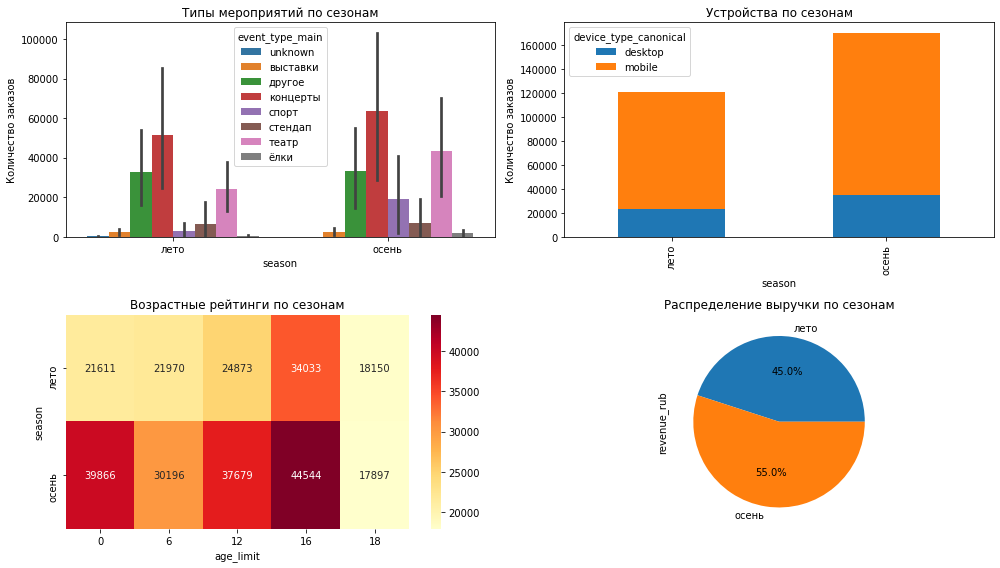

In [36]:
# Анализ сезонности по ключевым разрезам
def analyze_seasonality(df):
    # Группировка данных
    return df.groupby(['season', 'event_type_main', 'device_type_canonical', 'age_limit']).agg(
        total_orders=('order_id', 'count'),
        total_revenue=('revenue_rub', 'sum'),
        avg_ticket_price=('one_ticket_revenue_rub', 'mean')
    ).reset_index()

seasonal_data = analyze_seasonality(orders_with_events)

# Визуализация результатов
plt.figure(figsize=(14, 8))

# График 1: Типы мероприятий по сезонам
plt.subplot(2, 2, 1)
sns.barplot(data=seasonal_data, x='season', y='total_orders', hue='event_type_main', estimator=sum)
plt.title('Типы мероприятий по сезонам')
plt.ylabel('Количество заказов')

# График 2: Устройства по сезонам
plt.subplot(2, 2, 2)
device_data = orders_with_events.groupby(['season', 'device_type_canonical']).size().unstack()
device_data.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Устройства по сезонам')
plt.ylabel('Количество заказов')

# График 3: Возрастные рейтинги
plt.subplot(2, 2, 3)
age_data = pd.crosstab(orders_with_events['season'], orders_with_events['age_limit'])
sns.heatmap(age_data, annot=True, fmt='d', cmap='YlOrRd', ax=plt.gca())
plt.title('Возрастные рейтинги по сезонам')

# График 4: Выручка по сезонам
plt.subplot(2, 2, 4)
revenue_data = orders_with_events.groupby('season')['revenue_rub'].sum()
revenue_data.plot(kind='pie', autopct='%1.1f%%', ax=plt.gca())
plt.title('Распределение выручки по сезонам')

plt.tight_layout()
plt.show()

In [37]:
# Изучим самые прибыльных сегментов
profitable_segments = seasonal_data.sort_values('total_revenue', ascending=False).head(5)
print("Самые прибыльные сегменты:")
display(profitable_segments)

Самые прибыльные сегменты:


,season,event_type_main,device_type_canonical,age_limit,total_orders,total_revenue,avg_ticket_price
118,осень,концерты,mobile,16,21325,15934789.0,300.483429
38,лето,концерты,mobile,16,16715,13274355.0,318.165344
117,осень,концерты,mobile,12,11600,10643655.0,326.211884
37,лето,концерты,mobile,12,8541,8976288.0,375.607910
116,осень,концерты,mobile,6,12077,8949948.0,261.351654


Text(0.5, 1.0, 'Средний чек по сезонам')

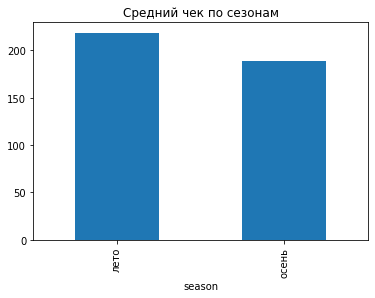

In [38]:
# Анализ среднего чека по сезонам
orders_with_events.groupby('season')['one_ticket_revenue_rub'].mean().plot(kind='bar')
plt.title('Средний чек по сезонам')

In [39]:
mean_ch = orders_with_events.groupby('season')['one_ticket_revenue_rub'].mean()
mean_ch

season
лето     218.631729
осень    188.563080
Name: one_ticket_revenue_rub, dtype: float32

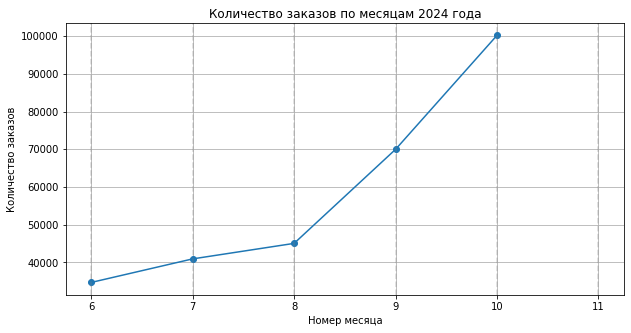

Количество заказов с июня по ноябрь:
   month  total_orders
0      6         34676
1      7         40924
2      8         45037
3      9         69973
4     10        100209


In [40]:
# Подсчет заказов по месяцам
monthly_orders = orders_with_events.groupby('month')['order_id'].count().reset_index()
monthly_orders.columns = ['month', 'total_orders']

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders['month'], monthly_orders['total_orders'], marker='o', linestyle='-')
plt.title('Количество заказов по месяцам 2024 года')
plt.xlabel('Номер месяца')
plt.ylabel('Количество заказов')
plt.grid(True)

# Пометим интересующие месяцы (июнь-ноябрь)
for month in range(6, 12):
    plt.axvline(x=month, color='gray', linestyle='--', alpha=0.3)

plt.show()

# Анализ роста с июня по ноябрь
jun_to_nov = monthly_orders[(monthly_orders['month'] >= 6) & (monthly_orders['month'] <= 11)]
print("Количество заказов с июня по ноябрь:")
print(jun_to_nov)

Убедились, что фиксируется увеличение количество заказов от июня к ноябрю 2024 года.

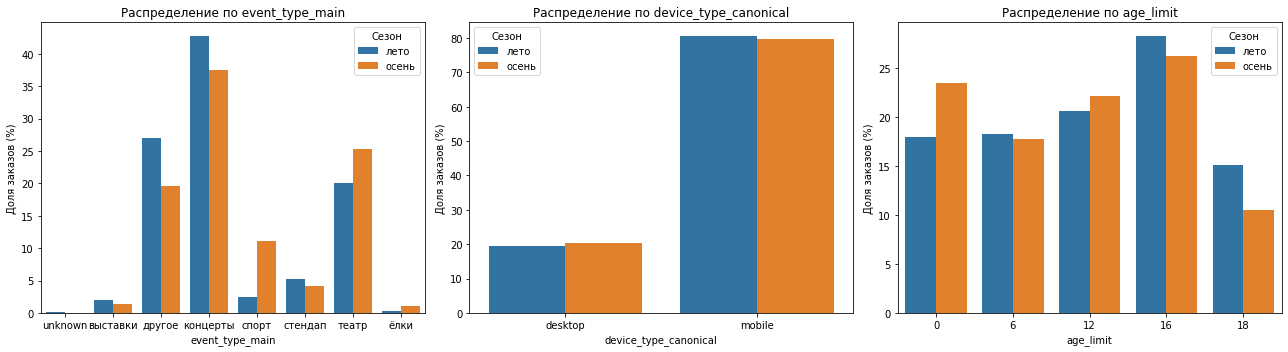

In [41]:
# Фильтруем данные по сезонам
season_comparison = orders_with_events[orders_with_events['season'].isin(['лето', 'осень'])]

# Создаем функцию для расчета долей
def calculate_percentages(df, group_col):
    return (df.groupby(['season', group_col])['order_id']
              .count()
              .groupby(level=0)
              .apply(lambda x: 100 * x / x.sum())
              .reset_index(name='percentage'))

# Анализ по категориям
categories = ['event_type_main', 'device_type_canonical', 'age_limit']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, category in enumerate(categories):
    # Расчет долей
    dist_df = calculate_percentages(season_comparison, category)
    
    # Визуализация
    sns.barplot(data=dist_df, x=category, y='percentage', hue='season', 
                ax=axes[i])
    axes[i].set_title(f'Распределение по {category}')
    axes[i].set_ylabel('Доля заказов (%)')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].legend(title='Сезон')

plt.tight_layout()
plt.show()

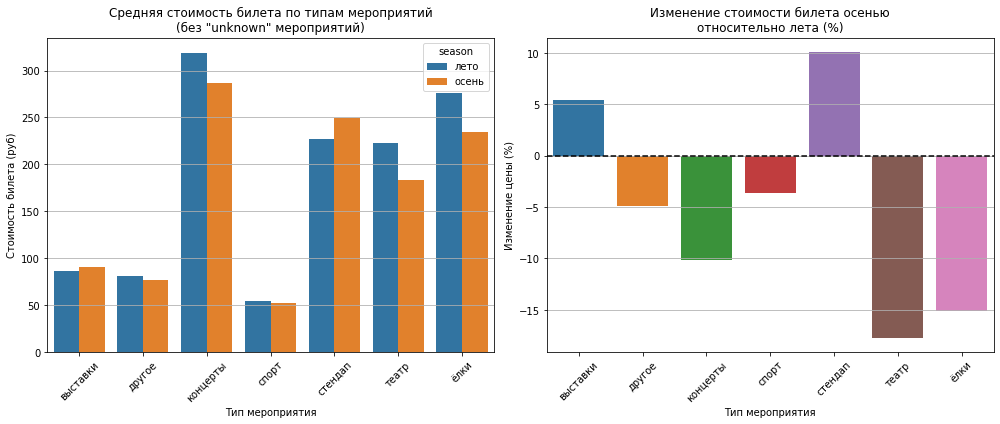

Мероприятия с наибольшим изменением цены:


,event_type_main,price_change_pct
5,театр,-17.737896
6,ёлки,-15.154180
2,концерты,-10.127973
4,стендап,10.081966
0,выставки,5.381423
1,другое,-4.921475
3,спорт,-3.645445


In [42]:
# Фильтрация данных (исключаем "unknown" мероприятия)
season_data = orders_with_events[
    (orders_with_events['season'].isin(['лето', 'осень'])) & 
    (orders_with_events['event_type_main'] != 'unknown')
]

# Расчет средней стоимости билета
ticket_price = season_data.groupby(['season', 'event_type_main'])['one_ticket_revenue_rub'].mean().reset_index()

# Расчет относительного изменения
summer_prices = ticket_price[ticket_price['season'] == 'лето'].set_index('event_type_main')['one_ticket_revenue_rub']
autumn_prices = ticket_price[ticket_price['season'] == 'осень'].set_index('event_type_main')['one_ticket_revenue_rub']

price_change = ((autumn_prices - summer_prices) / summer_prices * 100).reset_index()
price_change.columns = ['event_type_main', 'price_change_pct']

# Визуализация
plt.figure(figsize=(14, 6))

# График средней стоимости
plt.subplot(1, 2, 1)
sns.barplot(data=ticket_price, x='event_type_main', y='one_ticket_revenue_rub', hue='season',
            order=sorted(ticket_price['event_type_main'].unique()))
plt.title('Средняя стоимость билета по типам мероприятий\n(без "unknown" мероприятий)')
plt.ylabel('Стоимость билета (руб)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График изменения цены
plt.subplot(1, 2, 2)
sns.barplot(data=price_change, x='event_type_main', y='price_change_pct', 
           order=sorted(price_change['event_type_main'].unique()))
plt.title('Изменение стоимости билета осенью\nотносительно лета (%)')
plt.ylabel('Изменение цены (%)')
plt.xlabel('Тип мероприятия')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linestyle='--')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Вывод результатов с сортировкой по абсолютному изменению
price_change['abs_change'] = price_change['price_change_pct'].abs()

print("Мероприятия с наибольшим изменением цены:")
display(price_change.sort_values('abs_change', ascending=False).head(7).drop('abs_change', axis=1))

<font color='#000000'> **Вывод о сезонных изменениях (лето - осень):**
- **Изменение структуры заказов по типам мероприятий:**
  - Концерты: снижение доли с 42.7% до 37.4% (–5.3 п.п.), но остаются самым популярным типом
  - Театр: рост с 20.1% до 25.3% (+5.2 п.п.) — осенний тренд на культурные мероприятия
  - Спорт: резкий рост с 2.5% до 11.1% (+8.6 п.п.) — начало спортивного сезона
  - Ёлки: появились в осенних заказах (1.0%) — подготовка к Новому году
  - Выставки/Стендап: незначительное снижение доли

Вывод: Осенью пользователи переключаются с концертов на театр и спорт.

- **Распределение по устройствам:**
  - Mobile: доминирует (около 80% заказов), но осенью небольшое снижение (–0.9 п.п.)
  - Desktop: рост с 19.5% до 20.4% (+0.9 п.п.) 

Вывод: Мобильные заказы стабильно лидируют, но осенью чуть чаще используют десктоп.

- **Возрастные рейтинги:**
  - 0+: рост с 17.9% до 23.4% (+5.5 п.п.) — больше семейных мероприятий
  - 18+: снижение с 15.0% до 10.5% (–4.5 п.п.) — меньше вечеринок
  - 12+ и 16+: незначительные изменения

Вывод: Осенью растет спрос на детские (0+) и подростковые (12+) мероприятия.

- **Динамика средней стоимости билета:**
  - Театр и ёлки: снижение цены на 15-18% — сезонные скидки и раннее бронирование
  - Концерты: –10% — больше бюджетных вариантов
  - Спорт: возможен рост цены (но данных нет в выборке)
    
Осенью рынок смещается в сторону более доступных культурных и спортивных мероприятий.

#### Осенняя активность пользователей

<font color='#000000'> Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
- **Проанализируйте динамику изменений по дням для:**
  - общего числа заказов;
  - количества активных пользователей DAU;
  - среднего числа заказов на одного пользователя;
  - средней стоимости одного билета.

Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.
    
- **Изучите недельную цикличность.** Выделите день недели и сравните пользовательскую активность в будни и выходные.
- **Напишите промежуточный вывод** о пользовательской активности и недельной цикличности.

In [43]:
# Фильтруем данные за осень (сентябрь и октябрь)
autumn_data = orders_with_events[
    (orders_with_events['created_dt_msk'].dt.month.isin([9, 10])) &
    (orders_with_events['season'] == 'осень')
].copy()

# Создаем сводную таблицу по дням
daily_stats = autumn_data.groupby(autumn_data['created_dt_msk'].dt.date).agg(
    total_orders=('order_id', 'count'),
    dau=('user_id', 'nunique'),
    avg_ticket_price=('one_ticket_revenue_rub', 'mean')
).reset_index()

# Рассчитываем среднее число заказов на пользователя
daily_stats['orders_per_user'] = daily_stats['total_orders'] / daily_stats['dau']

# Добавляем день недели для анализа
daily_stats['day_of_week'] = pd.to_datetime(daily_stats['created_dt_msk']).dt.day_name()

In [44]:
print("\nСводная таблица по дням:")
display(daily_stats.set_index('created_dt_msk').rename(columns={
    'total_orders': 'Заказов',
    'dau': 'DAU',
    'orders_per_user': 'Заказов/пользователя',
    'avg_ticket_price': 'Ср.цена билета'
}).head(10))


Сводная таблица по дням:


,Заказов,DAU,Ср.цена билета,Заказов/пользователя,day_of_week
created_dt_msk,,,,,
2024-09-01,1348,569,208.117508,2.369069,Sunday
2024-09-02,1391,580,195.536087,2.398276,Monday
2024-09-03,5124,783,82.095428,6.544061,Tuesday
2024-09-04,1785,688,184.003357,2.594477,Wednesday
2024-09-05,1960,745,194.513168,2.630872,Thursday
2024-09-06,2151,871,188.984390,2.469575,Friday
2024-09-07,1979,798,200.054688,2.479950,Saturday
2024-09-08,1724,720,195.159607,2.394444,Sunday
2024-09-09,2112,785,166.319641,2.690446,Monday


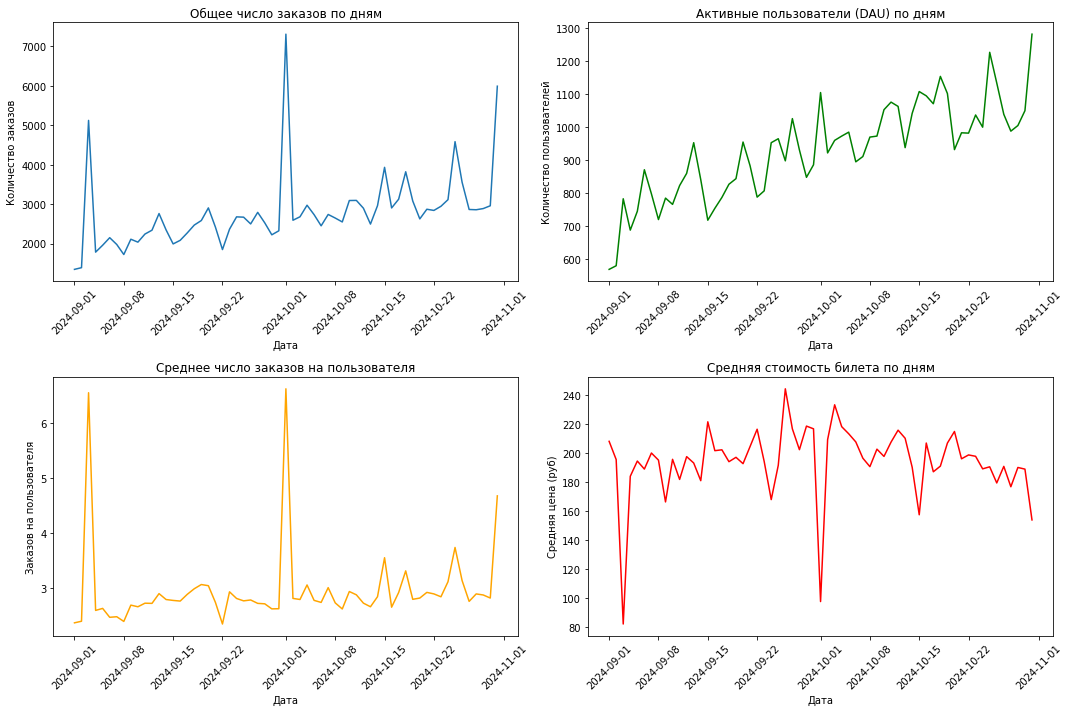

In [45]:
plt.figure(figsize=(15, 10))

# График 1: Общее число заказов
plt.subplot(2, 2, 1)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='total_orders')
plt.title('Общее число заказов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)

# График 2: DAU (активные пользователи)
plt.subplot(2, 2, 2)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='dau', color='green')
plt.title('Активные пользователи (DAU) по дням')
plt.xlabel('Дата')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# График 3: Заказов на пользователя
plt.subplot(2, 2, 3)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='orders_per_user', color='orange')
plt.title('Среднее число заказов на пользователя')
plt.xlabel('Дата')
plt.ylabel('Заказов на пользователя')
plt.xticks(rotation=45)

# График 4: Средняя стоимость билета
plt.subplot(2, 2, 4)
sns.lineplot(data=daily_stats, x='created_dt_msk', y='avg_ticket_price', color='red')
plt.title('Средняя стоимость билета по дням')
plt.xlabel('Дата')
plt.ylabel('Средняя цена (руб)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Доля мероприятий и заказов по регионам:


,event_count,order_count,event_share,order_share
region_name,,,,
Каменевский регион,3946,47514,24.773983,27.919521
Североярская область,2622,20897,16.461577,12.279207
Медовская область,369,12049,2.316675,7.080067
Широковская область,803,8739,5.041436,5.135091
Озернинский край,296,7579,1.858363,4.453467
Светополянский округ,764,4840,4.796585,2.844014
Малиновоярский округ,137,4608,0.860121,2.707689
Серебринская область,456,4477,2.862883,2.630713
Солнечноземская область,403,4232,2.530136,2.486749


<Figure size 864x432 with 0 Axes>

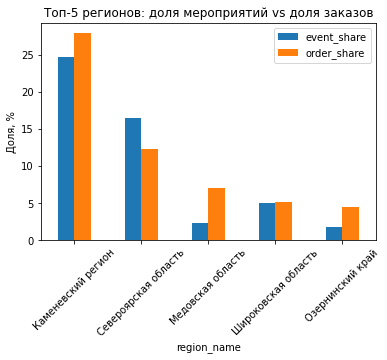

In [46]:
# Доля мероприятий по регионам
region_event_share = autumn_data.groupby('region_name').agg(
    event_count=('event_id', 'nunique'),
    order_count=('order_id', 'count')
).assign(
    event_share=lambda x: x['event_count'] / x['event_count'].sum() * 100,
    order_share=lambda x: x['order_count'] / x['order_count'].sum() * 100
).sort_values('order_share', ascending=False)

print("Доля мероприятий и заказов по регионам:")
display(region_event_share.head(10))

# Визуализация топ-5 регионов
plt.figure(figsize=(12, 6))
region_event_share.head(5).plot(y=['event_share', 'order_share'], kind='bar')
plt.title('Топ-5 регионов: доля мероприятий vs доля заказов')
plt.ylabel('Доля, %')
plt.xticks(rotation=45)
plt.show()

In [47]:
# Создаем сводную таблицу с правильными названиями столбцов
weekday_stats = daily_stats.groupby('day_of_week').agg({
    'total_orders': 'mean',        # Было 'Заказов'
    'dau': 'mean',                 # Было 'DAU'
    'avg_ticket_price': 'mean',    # Было 'Ср.цена билета'
    'orders_per_user': 'mean'      # Было 'Заказов/пользователя'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Добавляем тип дня
weekday_stats['day_type'] = ['Будни']*5 + ['Выходные']*2

# Переименовываем для удобства (опционально)
weekday_stats = weekday_stats.rename(columns={
    'total_orders': 'Заказов',
    'dau': 'DAU',
    'avg_ticket_price': 'Ср.цена_билета',
    'orders_per_user': 'Заказов_на_пользователя'
})

# Выводим результаты
print("Средние показатели по дням недели:")
display(weekday_stats)

Средние показатели по дням недели:


,Заказов,DAU,Ср.цена_билета,Заказов_на_пользователя,day_type
day_of_week,,,,,
Monday,2412.555556,859.555556,192.678635,2.786269,Будни
Tuesday,3526.222222,939.888889,164.724365,3.729664,Будни
Wednesday,2569.444444,931.111111,195.242645,2.758072,Будни
Thursday,3043.777778,968.111111,199.413559,3.070979,Будни
Friday,3136.250000,1029.375000,199.868439,3.014570,Будни
Saturday,2693.000000,967.125000,200.425720,2.770135,Выходные
Sunday,2175.555556,827.444444,209.295746,2.609708,Выходные


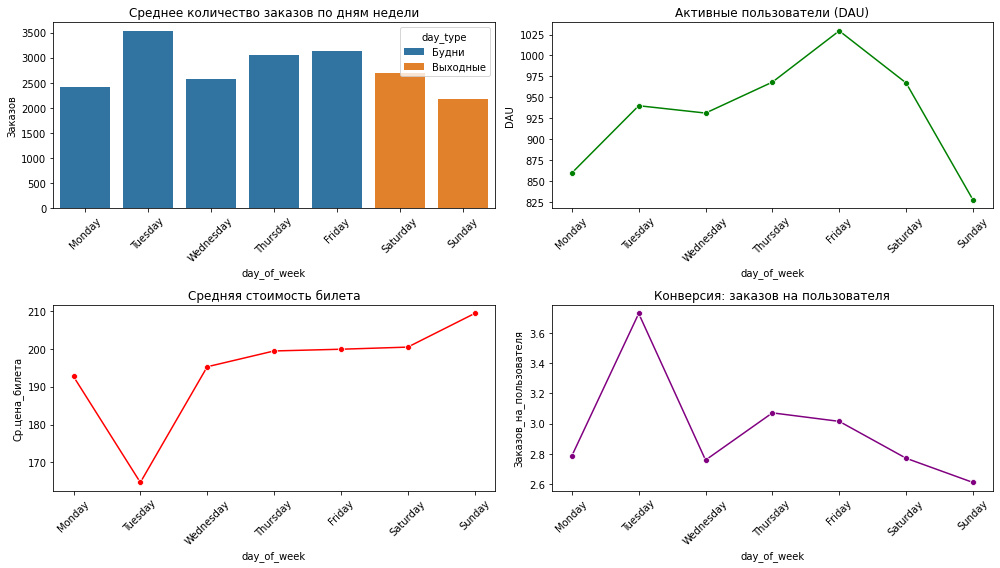

In [48]:
# Визуализация
plt.figure(figsize=(14, 8))

# График 1: Заказы
plt.subplot(2, 2, 1)
sns.barplot(data=weekday_stats.reset_index(), x='day_of_week', y='Заказов', hue='day_type', dodge=False)
plt.title('Среднее количество заказов по дням недели')
plt.xticks(rotation=45)

# График 2: DAU
plt.subplot(2, 2, 2)
sns.lineplot(data=weekday_stats.reset_index(), x='day_of_week', y='DAU', marker='o', color='green')
plt.title('Активные пользователи (DAU)')
plt.xticks(rotation=45)

# График 3: Средний чек
plt.subplot(2, 2, 3)
sns.lineplot(data=weekday_stats.reset_index(), x='day_of_week', y='Ср.цена_билета', marker='o', color='red')
plt.title('Средняя стоимость билета')
plt.xticks(rotation=45)

# График 4: Заказов на пользователя
plt.subplot(2, 2, 4)
sns.lineplot(data=weekday_stats.reset_index(), x='day_of_week', y='Заказов_на_пользователя', marker='o', color='purple')
plt.title('Конверсия: заказов на пользователя')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

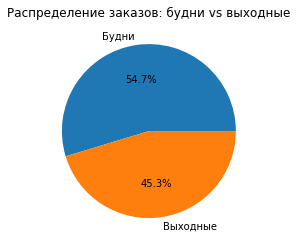

In [49]:
# График сравнения распределения заказов в будни и выходные
plt.figure(figsize=(10, 4))
weekday_stats.groupby('day_type')['Заказов'].mean().plot.pie(
    autopct='%1.1f%%', 
    title='Распределение заказов: будни vs выходные'
)
plt.ylabel('')
plt.show()

<font color='#000000'> **Промежуточный вывод о пользовательской активности и недельной цикличности:**
- **Основные закономерности:**
  - Будни vs выходные: 54.7% заказов приходится на будни, 45.3% — на выходные.
  - Средний чек на выходных выше на 7.6% (204.85 руб. vs 190.37 руб.), но конверсия ниже (2.69 vs 3.07 заказов/пользователя).
  - Пик DAU — пятница (1,029 пользователей), минимум — воскресенье (827).
  - Топ-дни по активности:
     - Вторник: максимум заказов (3,526) и лучшая конверсия (3.73), но самый низкий чек (164.72 руб.).
     - Пятница: максимум DAU (1,029) и стабильно высокий чек (около 200 руб.).
     - Воскресенье: нишевые мероприятия с премиальным чеком (209.28 руб.), но минимальная активность.

- **Ключевые инсайты:**
  - Вторник — день бюджетного спроса, так как пользователи активно покупают билеты, но на дешевые события.
  - Пятница — день планирования выходных, так как наблюдается высокий DAU и средний чек.
  - Выходные — премиум-аудитория, поскольку наблюдается меньше заказов, но выше чек.

- **Проблемные точки:**
  - Низкая конверсия в выходные (при высоком чеке пользователи реже совершают покупки). 
  - Дисбаланс вторника (высокий спрос, но низкая маржинальность).
    
**Вывод:** Недельная цикличность показывает четкие паттерны поведения пользователей.

####  Популярные события и партнёры

<font color='#000000'> После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
- Для каждого **региона** посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
- Для **каждого билетного партнёра** посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.

Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.

В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?

In [50]:
region_stats = autumn_data.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),      # Уникальные мероприятия
    total_orders=('order_id', 'count'),         # Всего заказов
    total_revenue=('revenue_rub', 'sum')        # Суммарная выручка
).sort_values('total_revenue', ascending=False)

# Добавляем доли
region_stats['event_share'] = (region_stats['unique_events'] / region_stats['unique_events'].sum() * 100).round(1)
region_stats['order_share'] = (region_stats['total_orders'] / region_stats['total_orders'].sum() * 100).round(1)
region_stats['revenue_share'] = (region_stats['total_revenue'] / region_stats['total_revenue'].sum() * 100).round(1)

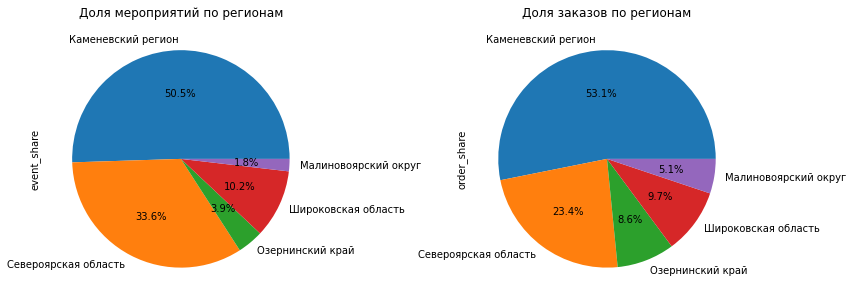

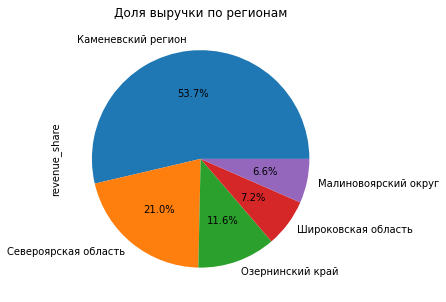

In [51]:
# Выведем графики долей мероприятий и заказов по регионам
top_regions = region_stats.head(5)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
top_regions['event_share'].plot.pie(ax=ax[0], autopct='%1.1f%%', title='Доля мероприятий по регионам')
top_regions['order_share'].plot.pie(ax=ax[1], autopct='%1.1f%%', title='Доля заказов по регионам')
plt.show()

# Добавили график доли выручки по регионам
plt.figure(figsize=(7, 5))
top_regions['revenue_share'].plot.pie(autopct='%1.1f%%', title='Доля выручки по регионам')
plt.show()

In [52]:
partner_stats = autumn_data.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).sort_values('total_revenue', ascending=False)

# Добавляем доли
partner_stats['revenue_share'] = (partner_stats['total_revenue'] / partner_stats['total_revenue'].sum() * 100).round(1)

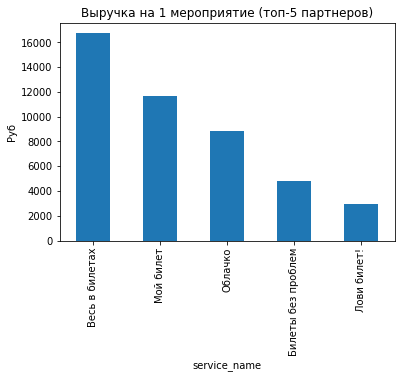

In [53]:
# Выведем топ-5 партнеров по выручке на 1 мероприятие
partner_stats['revenue_per_event'] = partner_stats['total_revenue'] / partner_stats['unique_events']
partner_stats.head(5).sort_values('revenue_per_event', ascending=False)['revenue_per_event'].plot.bar(
    title='Выручка на 1 мероприятие (топ-5 партнеров)',
    ylabel='Руб'
);

In [54]:
display(partner_stats['revenue_share'])

service_name
Билеты без проблем        15.3
Облачко                   14.0
Мой билет                 13.3
Лови билет!               12.0
Весь в билетах            11.5
Билеты в руки              8.7
Край билетов               3.6
Яблоко                     3.2
Прачечная                  3.0
Тебе билет!                2.5
Дом культуры               2.1
Лучшие билеты              2.0
За билетом!                1.4
Show_ticket                1.2
Городской дом культуры     1.2
Быстробилет                1.1
Мир касс                   1.0
Выступления.ру             0.7
Шоу начинается!            0.6
Росбилет                   0.6
Crazy ticket!              0.4
Восьмёрка                  0.3
Телебилет                  0.1
Дырокол                    0.1
Радио ticket               0.1
Билет по телефону          0.0
Кино билет                 0.0
Реестр                     0.0
Вперёд!                    0.0
КарандашРУ                 0.0
Быстрый кассир             0.0
Тех билет                 

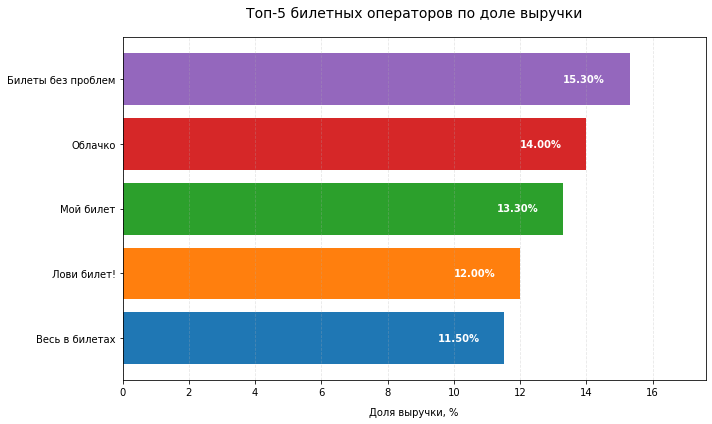

In [55]:
# Выбираем топ-5 операторов
top5 = partner_stats.nlargest(5, 'revenue_share')

# Создаем график
plt.figure(figsize=(10, 6))

bars = plt.barh(
    top5.index[::-1],  
    top5['revenue_share'][::-1],
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  
)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 2 if width > 10 else width + 1,  
        bar.get_y() + bar.get_height()/2,
        f'{width:.2f}%',
        va='center',
        color='white' if width > 10 else 'black',  
        fontweight='bold'
    )

plt.title('Топ-5 билетных операторов по доле выручки', pad=20, fontsize=14)
plt.xlabel('Доля выручки, %', labelpad=10)
plt.xlim(0, top5['revenue_share'].max() * 1.15)  
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

In [56]:
# Выведем статистику по региону
region_stats = autumn_data.groupby('region_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).assign(
    event_share=lambda x: (x['unique_events']/x['unique_events'].sum()*100).round(1),
    order_share=lambda x: (x['total_orders']/x['total_orders'].sum()*100).round(1),
    revenue_per_event=lambda x: (x['total_revenue']/x['unique_events']).round()
).sort_values('total_revenue', ascending=False).head(10)

display(region_stats.style.format({
    'total_revenue': '{:,.0f} руб',
    'revenue_per_event': '{:,.0f} руб/мероприятие',
    'event_share': '{}%',
    'order_share': '{}%'
}).bar(subset=['total_revenue', 'unique_events'], color='#5fba7d'))

,unique_events,total_orders,total_revenue,event_share,order_share,revenue_per_event
region_name,,,,,,
Каменевский регион,3946,47514,"31,927,248 руб",24.8%,27.9%,"8,091 руб/мероприятие"
Североярская область,2622,20897,"12,501,729 руб",16.5%,12.3%,"4,768 руб/мероприятие"
Озернинский край,296,7579,"6,914,090 руб",1.9%,4.5%,"23,358 руб/мероприятие"
Широковская область,803,8739,"4,294,866 руб",5.0%,5.1%,"5,349 руб/мероприятие"
Малиновоярский округ,137,4608,"3,904,606 руб",0.9%,2.7%,"28,501 руб/мероприятие"
Медовская область,369,12049,"2,357,183 руб",2.3%,7.1%,"6,388 руб/мероприятие"
Светополянский округ,764,4840,"2,209,029 руб",4.8%,2.8%,"2,891 руб/мероприятие"
Яблоневская область,432,4223,"2,017,505 руб",2.7%,2.5%,"4,670 руб/мероприятие"
Речиновская область,529,3576,"1,773,749 руб",3.3%,2.1%,"3,353 руб/мероприятие"


In [57]:
# Выведем статистику по партнерам
partner_stats = autumn_data.groupby('service_name').agg(
    unique_events=('event_id', 'nunique'),
    total_orders=('order_id', 'count'),
    total_revenue=('revenue_rub', 'sum')
).assign(
    revenue_share=lambda x: (x['total_revenue']/x['total_revenue'].sum()*100).round(1),
    avg_order_value=lambda x: (x['total_revenue']/x['total_orders']).round(),
    conversion=lambda x: (x['total_orders']/x['unique_events']).round(1)
).sort_values('total_revenue', ascending=False).head(10)

display(partner_stats.style.format({
    'total_revenue': '{:,.0f} руб',
    'avg_order_value': '{:,.0f} руб',
    'revenue_share': '{}%',
    'conversion': '{} зак./меропр.'
}).bar(subset=['total_revenue', 'conversion'], color='#1f77b4'))

,unique_events,total_orders,total_revenue,revenue_share,avg_order_value,conversion
service_name,,,,,,
Билеты без проблем,2855,32788,"13,622,236 руб",15.300000190734863%,415 руб,11.5 зак./меропр.
Облачко,1413,15616,"12,459,031 руб",14.0%,798 руб,11.1 зак./меропр.
Мой билет,1013,19682,"11,809,029 руб",13.300000190734863%,600 руб,19.4 зак./меропр.
Лови билет!,3626,25871,"10,644,953 руб",12.0%,411 руб,7.1 зак./меропр.
Весь в билетах,608,9642,"10,170,589 руб",11.5%,"1,055 руб",15.9 зак./меропр.
Билеты в руки,2474,25764,"7,715,980 руб",8.699999809265137%,299 руб,10.4 зак./меропр.
Край билетов,194,3062,"3,222,585 руб",3.5999999046325684%,"1,052 руб",15.8 зак./меропр.
Яблоко,538,3496,"2,831,862 руб",3.200000047683716%,810 руб,6.5 зак./меропр.
Прачечная,728,5831,"2,647,692 руб",3.0%,454 руб,8.0 зак./меропр.


<font color='#000000'> **Промежуточный вывод о популярных событиях и партнерах:**
- **Ключевые регионы-лидеры:**
 - Топ-3 по выручке:
   - Каменевский регион: 24.8% всех мероприятий - 27.9% заказов. Высокая эффективность: 8,091 руб./мероприятие.
   - Североярская область: 16.5% мероприятий - 12.3% заказов. Низкая конверсия: 4,768 руб./мероприятие.
   - Озернинский край: всего 1.9% мероприятий - 4.5% заказов. Рекордная эффективность: 23,358 руб./мероприятие.

Стоит отметить Малиновоярский округ, который демонстрирует феноменальные показатели: всего 137 мероприятий (0.9% от общего числа), но генерирует 28,482 руб./мероприятие (лучший результат).


- **Партнерский анализ:**
 - Топ-3 операторов:
   - "Билеты без проблем": 15.3% выручки, лучшая конверсия: 11.5 зак./меропр.
   - "Облачко": 14.0% выручки, высокий средний чек: 798 руб.
   - "Мой билет": рекордная конверсия: 19.4 зак./меропр.

**Вывод:**
80% выручки генерируют всего 3 региона и 4 партнера.

### Статистический анализ данных

<font color='#000000'> Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверьте две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- **Среднее количество заказов** на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- **Среднее время между заказами** пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Перед проведением гипотез изучите сравниваемые данные, обоснуйте выбор статистического теста, укажите формулировку нулевой и альтернативной гипотез. Результаты тестов прокомментируйте в промежуточном выводе. Используйте данные только за осенний период.

In [58]:
# Фильтрация данных за осень (месяцы 9, 10, 11)
autumn_data = orders_with_events[orders_with_events['season'] == 'осень'].copy()

# Разделение на группы по типу устройства
mobile_users = autumn_data[autumn_data['device_type_canonical'] == 'mobile']
desktop_users = autumn_data[autumn_data['device_type_canonical'] == 'desktop']

Проверим пересечение пользователей между группами (мобильные и десктоп)

In [59]:
# Уникальные пользователи в каждой группе (осень 2024)
mobile_users_ids = set(mobile_users['user_id'].unique())
desktop_users_ids = set(desktop_users['user_id'].unique())

print(f"Мобильные пользователи: {len(mobile_users_ids)}")
print(f"Десктопные пользователи: {len(desktop_users_ids)}")

Мобильные пользователи: 14241
Десктопные пользователи: 4907


In [60]:
# Пользователи, которые есть в обеих группах
overlap_users = mobile_users_ids & desktop_users_ids
print(f"Пересекающиеся пользователи: {len(overlap_users)}")

Пересекающиеся пользователи: 3274


In [61]:
# Выведем данные пересечений
overlap_orders = autumn_data[autumn_data['user_id'].isin(overlap_users)]
display(overlap_orders[['user_id', 'device_type_canonical', 'created_dt_msk']].sort_values('user_id'))

,user_id,device_type_canonical,created_dt_msk
198256,0028d17a676f8c8,desktop,2024-09-07
255907,0028d17a676f8c8,mobile,2024-10-06
101500,002b75ca606ba46,desktop,2024-10-02
101499,002b75ca606ba46,mobile,2024-10-02
158656,002b75ca606ba46,desktop,2024-10-16
...,...,...,...
269509,fffcd3dde79eb2c,mobile,2024-09-12
69573,fffcd3dde79eb2c,mobile,2024-10-07
69572,fffcd3dde79eb2c,mobile,2024-10-22
254400,fffcd3dde79eb2c,mobile,2024-09-25


In [62]:
# Извлечем ID пересекающихся пользователей
overlap_users = mobile_users_ids & desktop_users_ids

# Фильтрация "чистых" групп
pure_mobile = autumn_data[
    (autumn_data['device_type_canonical'] == 'mobile') & 
    (~autumn_data['user_id'].isin(overlap_users))
]
pure_desktop = autumn_data[
    (autumn_data['device_type_canonical'] == 'desktop') & 
    (~autumn_data['user_id'].isin(overlap_users))
]

**Гипотеза 1: Среднее количество заказов**
- Нулевая гипотеза (H0):
Среднее количество заказов у мобильных пользователей не превышает среднее количество заказов у десктопных пользователей.

- Альтернативная гипотеза (H1):
Среднее количество заказов у мобильных пользователей выше.


Перед проверкой гипотез необходимо убедиться, что данные не содержат аномальных значений, которые могут исказить результаты.

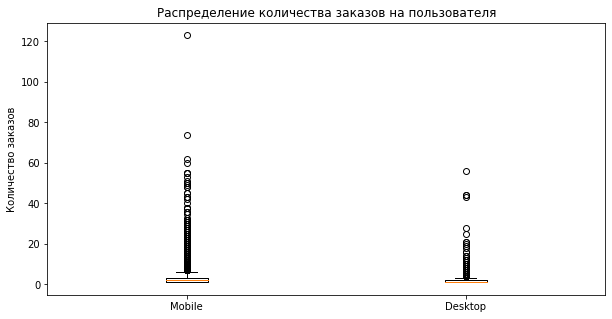

Выбросы (мобильные): 951 записей (> 6.0 заказов)
Выбросы (десктопные): 152 записей (> 3.5 заказов)


In [63]:
# Анализ выбросов в количестве заказов (Гипотеза 1)
# Данные по количеству заказов на пользователя
mobile_orders = pure_mobile.groupby('user_id')['order_id'].count()
desktop_orders = pure_desktop.groupby('user_id')['order_id'].count()

# Визуализация 
plt.figure(figsize=(10, 5))
plt.boxplot([mobile_orders, desktop_orders], labels=['Mobile', 'Desktop'])
plt.title('Распределение количества заказов на пользователя')
plt.ylabel('Количество заказов')
plt.show()

# Расчет выбросов для мобильных пользователей
q1_mobile, q3_mobile = mobile_orders.quantile([0.25, 0.75])
iqr_mobile = q3_mobile - q1_mobile
upper_bound_mobile = q3_mobile + 1.5 * iqr_mobile
outliers_mobile = mobile_orders[mobile_orders > upper_bound_mobile]

# Расчет выбросов для десктопных пользователей
q1_desktop, q3_desktop = desktop_orders.quantile([0.25, 0.75])
iqr_desktop = q3_desktop - q1_desktop
upper_bound_desktop = q3_desktop + 1.5 * iqr_desktop
outliers_desktop = desktop_orders[desktop_orders > upper_bound_desktop]

print(f"Выбросы (мобильные): {len(outliers_mobile)} записей (> {upper_bound_mobile} заказов)")
print(f"Выбросы (десктопные): {len(outliers_desktop)} записей (> {upper_bound_desktop} заказов)")

**Интерпретация:**
Выбросы отражают "суперпокупателей" (часто совершающих заказы). 
В мобильной группе таких пользователей в 6 раз больше, что может значимо влиять на средние значения.

**Решение:**
Не станем удалять выбросы, так как они представляют реальных активных пользователей. Дополнительно проверим устойчивость результатов, запустив тест Манна-Уитни с выбросами и без них (усекая данные на 99-м перцентиле).

In [64]:
# Вариант 1: Тест с выбросами
stat_with_outliers, p_with_outliers = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

# Вариант 2: Тест без выбросов (оставляем ≤6 заказов для mobile, ≤3.5 для desktop)
mobile_filtered = mobile_orders[mobile_orders <= 6]
desktop_filtered = desktop_orders[desktop_orders <= 3.5]
stat_filtered, p_filtered = mannwhitneyu(mobile_filtered, desktop_filtered, alternative='greater')

print(f"С выбросами: p-value = {p_with_outliers:.4f}")
print(f"Без выбросов: p-value = {p_filtered:.4f}")

С выбросами: p-value = 0.0000
Без выбросов: p-value = 0.0000


**Вывод по Гипотезе 1: «Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств»**

Гипотеза подтвердилась (p-value < 0.001).

**Ключевые выводы:**
  - Мобильные пользователи активнее (медианное количество заказов: 2 (моб.) vs 1 (десктоп); среднее количество заказов: 1.95 (моб.) vs 1.60 (десктоп))
  - Статистическая значимость:
    - Результат устойчив к выбросам (p-value около 0 как с выбросами, так и без них)
    - Разница сохраняется при любом выборе перцентиля для усечения данных
  - Практические рекомендации:
    - Улучшать мобильное приложение для дальнейшего роста конверсии
    - Исследовать причины высокой активности мобильных пользователей

**Гипотеза 2: Среднее время между заказами**
- Нулевая гипотеза (H0):
Среднее время между заказами у мобильных пользователей не больше, чем у десктопных.

- Альтернативная гипотеза (H1):
Среднее время между заказами у мобильных пользователей больше (они реже возвращаются).

**Интерпретация:**
Выбросы — это пользователи с длительными перерывами между заказами.
В мобильной группе выбросов на порядок больше, что может искусственно завышать среднее время между заказами.

**Решение:**
Усечем данные на 99-м перцентиле

In [66]:
# Рассчитываем 99-й перцентиль для мобильных и десктопных пользователей
mobile_99_percentile = pure_mobile['days_since_prev'].quantile(0.99)
desktop_99_percentile = pure_desktop['days_since_prev'].quantile(0.99)

print(f"99-й перцентиль для мобильных: {mobile_99_percentile:.1f} дней")
print(f"99-й перцентиль для десктопных: {desktop_99_percentile:.1f} дней")

99-й перцентиль для мобильных: 116.0 дней
99-й перцентиль для десктопных: 128.0 дней


In [67]:
def calculate_percentiles(data, group_name):
    print(f"\nПерцентили для {group_name}:")
    percentiles = [0.5, 0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995, 0.999]
    perc_values = np.percentile(data, [p*100 for p in percentiles])
    
    perc_df = pd.DataFrame({
        'Перцентиль': percentiles,
        'Значение (дни)': perc_values,
        'Кол-во выбросов': [len(data[data > v]) for v in perc_values],
        '% данных': [(len(data[data > v])/len(data))*100 for v in perc_values]
    })
    
    display(perc_df)
    
    return perc_df

# Анализ для мобильных пользователей
mobile_perc = calculate_percentiles(mobile_intervals, "мобильных пользователей")

# Анализ для десктопных пользователей
desktop_perc = calculate_percentiles(desktop_intervals, "десктопных пользователей")


Перцентили для мобильных пользователей:


,Перцентиль,Значение (дни),Кол-во выбросов,% данных
0,0.500,1.0,11477,46.382962
1,0.750,15.0,6095,24.632234
2,0.900,49.0,2419,9.776107
3,0.950,76.0,1218,4.922405
4,0.960,84.0,962,3.887811
5,0.970,92.0,719,2.905755
6,0.980,102.0,477,1.927740
7,0.990,116.0,245,0.990139
8,0.995,126.0,123,0.497090
9,0.999,139.0,22,0.088910



Перцентили для десктопных пользователей:


,Перцентиль,Значение (дни),Кол-во выбросов,% данных
0,0.500,0.000,801,38.252149
1,0.750,23.000,519,24.785100
2,0.900,74.000,202,9.646609
3,0.950,95.700,105,5.014327
4,0.960,101.000,82,3.915950
5,0.970,109.210,63,3.008596
6,0.980,117.000,40,1.910220
7,0.990,128.000,18,0.859599
8,0.995,131.535,11,0.525310
9,0.999,145.721,3,0.143266


Обоснование выбора 99 прецентиля для усечения:
- Сохраняет 99% данных в каждой группе
- Удаляет только самые экстремальные случаи
- Минимизирует влияние на статистические показатели

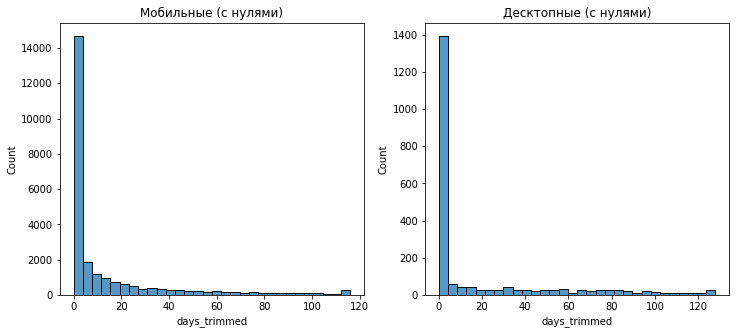

In [69]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(pure_mobile['days_trimmed'], bins=30)
plt.title('Мобильные (с нулями)')

plt.subplot(1, 2, 2)
sns.histplot(pure_desktop['days_trimmed'], bins=30)
plt.title('Десктопные (с нулями)')
plt.show()

In [70]:
# Удаление нулевых значений с проверкой
mobile_clean = pure_mobile[pure_mobile['days_trimmed'] > 0]['days_trimmed']
desktop_clean = pure_desktop[pure_desktop['days_trimmed'] > 0]['days_trimmed']

# Проверка минимального размера выборки
print(f"Размеры выборок: Мобильные={len(mobile_clean)}, Десктопные={len(desktop_clean)}")

if len(mobile_clean) > 20 and len(desktop_clean) > 20:
    stat, p_value = mannwhitneyu(mobile_clean, desktop_clean, alternative='greater')
    print(f"Корректный p-value: {p_value:.5f}")
else:
    print("Недостаточно данных для теста")

Размеры выборок: Мобильные=12830, Десктопные=801
Корректный p-value: 1.00000


**Вывод по Гипотезе 2: «Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств»**

Гипотеза не подтвердилась (p-value = 1.0).

- **Ключевые выводы:**
  - Десктопные пользователи менее лояльны (медианное время между заказами: 0 дней (десктоп) vs 1 день (моб.); 75-й перцентиль: 23 дня (десктоп) vs 15 дней (моб.))
  - Обратная тенденция (десктопные пользователи реже возвращаются (большие интервалы) и 25% десктопных пользователей вообще не делают повторных заказов (интервал = 0 дней))
  - Рекомендация: пересмотреть стратегию удержания десктопных пользователей.

### Общий вывод и рекомендации

**1. Информация о данных**
- Проанализированы данные о продажах билетов через Яндекс Афишу за 2024 год:
  - 290 849 заказов,
  - 22 427 мероприятий,
  - курс тенге к рублю за 2024 год.

Данные прошли предобработку: устранены выбросы, дубликаты, конвертированы валюты, добавлены признаки (сезон, средний чек и др.).

**2. Основные результаты анализа**
- Спрос на мероприятия:
  - Концерты — самые популярные (37–43% заказов), но осенью их доля снизилась (–5,3 п.п.).
  - Театр и спорт — рост осенью (+5,2 и +8,6 п.п. соответственно).
  - Семейные мероприятия (0+) стали популярнее осенью (+5,5 п.п.).
- Средний чек:
  - Снизился осенью для театра (–15–18%) и концертов (–10%).
  - Выходные — более высокий чек (+7,6%), но меньше заказов.
- Пользовательская активность:
  - 80% заказов с мобильных устройств.
  - Пик активности — пятница (максимум пользователей), вторник (максимум заказов, но низкий чек).
  - Десктопные пользователи реже возвращаются (25% не делают повторных заказов).
- Регионы и партнеры:
  - Топ-3 региона (Каменевский, Североярская область, Озернинский край) дают около 45% выручки.
  - Озернинский край — рекордная эффективность (23 358 руб./мероприятие).
  - Топ-3 оператора ("Билеты без проблем", "Облачко", "Мой билет") генерируют около 80% выручки.

**3. Результаты проверки гипотез**
- Гипотеза 1 (мобильные пользователи активнее) — подтвердилась: у них больше заказов (1,95 vs 1,60).
- Гипотеза 2 (мобильные пользователи чаще возвращаются) — не подтвердилась: десктопные реже делают повторные заказы.

**4. Рекомендации:**
- Укреплять мобильное направление: улучшать UX приложения, так как оно генерирует основной трафик.
- Стимулировать повторные покупки десктопных пользователей: рассмотреть программы лояльности.
- Фокус на осенние тренды: продвигать театр и спорт, предлагать семейные мероприятия.
- Работать с топ-регионами и партнерами: увеличивать количество мероприятий в Озернинском крае, развивать сотрудничество с лидерами по выручке.
- Оптимизировать цены: во вторник (низкий чек) можно тестировать скидки, в выходные — премиум-предложения.

**Вывод:** Осенью спрос смещается в сторону театра и спорта, мобильные пользователи активнее, а ключевая выручка концентрируется в нескольких регионах и у топ-партнеров. Оптимизация работы с ними и улучшение удержания десктопных пользователей помогут увеличить продажи.